In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2, glob, random, math, numpy as np, dlib, itertools
import os
import random
import pickle
import seaborn as sns
from sklearn.pipeline import Pipeline
from skimage.feature import hog
from matplotlib import pyplot as plt
from itertools import cycle
import sklearn
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cm1 = cf.astype(np.float64) / cf.sum(axis=1)[:, np.newaxis]
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{:.2f}'.format(value) for value in cm1.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [3]:
X2 = np.load('D:/img_240/HOG_8_label/feture_HOG_8_label/test/test_HOG_embreded.npy') 
y2 = np.load('D:/img_240/HOG_8_label/feture_HOG_8_label/test/test_labels_HOG.npy')

In [4]:
#X2.shape

<Figure size 360x360 with 0 Axes>

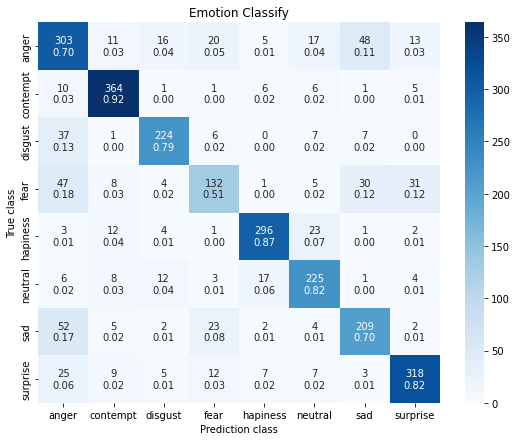

Class: anger Accuracy: 0.8838951310861424 Precision: 0.6997690531177829 Recall: 0.6273291925465838 F1_Score: 0.6615720524017468 Specificity: 0.9405578417924096

Class: contempt Accuracy: 0.9685393258426966 Precision: 0.9238578680203046 Recall: 0.8708133971291866 F1_Score: 0.896551724137931 Specificity: 0.9866785079928952

Class: disgust Accuracy: 0.9617977528089887 Precision: 0.7943262411347518 Recall: 0.835820895522388 F1_Score: 0.8145454545454546 Specificity: 0.9758534554537885

Class: fear Accuracy: 0.9280898876404494 Precision: 0.5116279069767442 Recall: 0.6666666666666666 F1_Score: 0.5789473684210527 Specificity: 0.9490291262135923

Class: hapiness Accuracy: 0.9685393258426966 Precision: 0.8654970760233918 Recall: 0.8862275449101796 F1_Score: 0.875739644970414 Specificity: 0.9803082191780822

Class: neutral Accuracy: 0.9550561797752809 Precision: 0.8152173913043478 Recall: 0.7653061224489796 F1_Score: 0.7894736842105263 Specificity: 0.9785353535353535

Class: sad Accuracy: 0.93220

In [5]:
%%time
def add_values_in_dict(sample_dict, key, list_of_values):
            ''' Append multiple values to a key in 
            the given dictionary '''
            if key not in sample_dict:
                sample_dict[key] = list()
            sample_dict[key].extend(list_of_values)
            return sample_dict

filename = 'C:/Users/ROG/embeded_HOG_model_8_lebelSVC5.sav'
model = pickle.load(open(filename, 'rb'))
result = model.score(X2, y2)
pred = model.predict(X2)
cm = confusion_matrix(y2, pred)
label_mapdisgust = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
        
        #cm1 = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
              columns = label_mapdisgust
              )
        
final_cm = cm_df

        #เเสดงผล confus matrix
emotion_labels = ['anger','contempt','disgust','fear','hapiness','neutral','sad','surprise']
plt.figure(figsize = (5,5))
        #sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
make_confusion_matrix(cm, figsize=(9,7), categories=emotion_labels)
plt.title('Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()
 #ใช้เก็บค่า TP FP FN TN ใน loop  confus matrix 7*7
TP2 = 0
FP2 = 0 
FN2 = 0
TN2 = 0
scor = {}
avg_scor = {}
ac = 0
pr = 0
re = 0
f1 = 0
sp = 0
for i in range(final_cm.shape[0]):
          TP = final_cm.iloc[i,i]
          FP =  final_cm.iloc[i,:].sum() - TP
          FN =  final_cm.iloc[: ,i].sum() - TP
          TN =  final_cm.sum().sum() - TP -FP - FN
          TP2 += TP
          FP2 += FP
          FN2 += FN
          TN2 += TN
          Accuracy = (TP + TN)  /  final_cm.sum().sum()
          Precision = TP / (TP + FP)
          Recall = TP / (TP + FN)
          Specificity = TN / (TN + FP)
          F1_Score = (2* Precision * Recall ) / (Precision + Recall)
    
          print("Class:",final_cm.index[i],"Accuracy:",Accuracy,"Precision:", Precision,"Recall:", Recall, 
                  "F1_Score:", F1_Score, "Specificity:", Specificity )
          print()

          ac += Accuracy
          pr += Precision
          re += Recall
          f1 += F1_Score
          sp += Specificity

          add_values_in_dict(scor, final_cm.index[i], [f'{Accuracy:.2f}',f'{Precision:.2f}',f'{Recall:.2f}',f'{F1_Score:.2f}',f'{Specificity:.2f}'])
print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('','Accuracy','Precision','Recall','F1_Score','Specificity'))
for k, v in scor.items():
          Accuracy, Precision, Recall,F1_Score,Specificity = v
          print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, Accuracy, Precision, Recall,F1_Score,Specificity))
              #pd.DataFrame(classification_report(model.y_train, model.pred)).T
add_values_in_dict(avg_scor,'macro avg',[f'{ac/8:.2f}' , f'{pr/8:.2f}' , f'{re/8:.2f}' , f'{f1/8:.2f}', f'{sp/8:.2f}'])
print()
for k, v in avg_scor.items():
      ac, pr, re,f1,sp = v
      print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(k, ac, pr, re,f1,sp))
   
        
Specificity = TN2 / (TN2 + FP2)
Sensitivity = TP2 / (FN2 + TP2)
print()  
print("Specificity", f'{Specificity:.2f}')
print("Sensitivity", f'{Sensitivity:.2f}')
#print(f"Overall Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
print()
print("TP:", TP2)
print("FN:", FN2)
print("FP:", FP2)
print("TN:", TN2)

print()
Score = accuracy_score(y2, pred)
print(f"Accuracy Score: {accuracy_score(y2, pred) * 100:.2f}%")